# Mall Customers Cluster Analysis

This project applies a complete data analysis and unsupervised learning pipeline to the Mall Customers Dataset, aiming to extract actionable insights from customer demographics and behavior.

It is structured in three parts:

**Data Exploration, Preprocessing, and Feature Engineering** - The dataset is cleaned and analyzed using pandas, with new features engineered to enhance data quality and analytical depth.

**Clustering with K-Means** - Unsupervised learning is applied to segment customers into distinct groups based on their features, helping identify patterns in customer behavior.

**Dimensionality Reduction and Classification** - Techniques like Principal Component Analysis (PCA) are used to reduce data dimensionality, followed by visualizations and potential classification tasks to better interpret cluster structures.

# Goal
The goal of this analysis is to perform customer and market segmentation using demographic and behavioral data from the Mall Customers Dataset.

By applying a complete data analysis and unsupervised learning pipeline—including feature engineering, K-Means clustering, and dimensionality reduction—the project aims to identify distinct customer segments with similar characteristics and spending behaviors.

These insights can support data-driven marketing strategies, personalized customer engagement, optimized product offerings, and improved resource allocation by enabling the business to better understand and target different customer groups.

https://scikit-learn.org/1.6/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py


# Mall Customers

This dataset provides valuable information about customers, such as age, income, and spending score. The primary goal of this project is to gain insights from the data through exploration, preprocessing, and feature engineering techniques.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

## Load data from excel file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_PATH = Path('/content/drive/MyDrive/DATA SCIENCE 2024/Mall Customer Data/')

In [6]:
malls_df = pd.read_excel(DATA_PATH / 'Mall Customers.xlsx')

## EDA

In [7]:
malls_df.shape

(200, 7)

In [8]:
#View the first 5 rows
malls_df.head().transpose()

,0,1,2,3,4
CustomerID,1,2,3,4,5
Gender,M,M,F,F,F
Age,19,21,20,23,31
Education,High School,Graduate,Graduate,High School,Uneducated
Marital Status,Married,Single,Married,Unknown,Married
Annual Income (k$),15,15,16,16,17
Spending Score (1-100),39,81,6,77,40


In [9]:
#summary info
malls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [10]:
# number of missing values
malls_df.isnull().sum().sort_values(ascending = False)

,0
CustomerID,0
Gender,0
Age,0
Education,0
Marital Status,0
Annual Income (k$),0
Spending Score (1-100),0


In [11]:
# are there any duplicate rows?
malls_df.duplicated().sum()

np.int64(0)

In [12]:
# summary statistics
malls_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,F,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Education,200,7,Graduate,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,200,4,Married,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

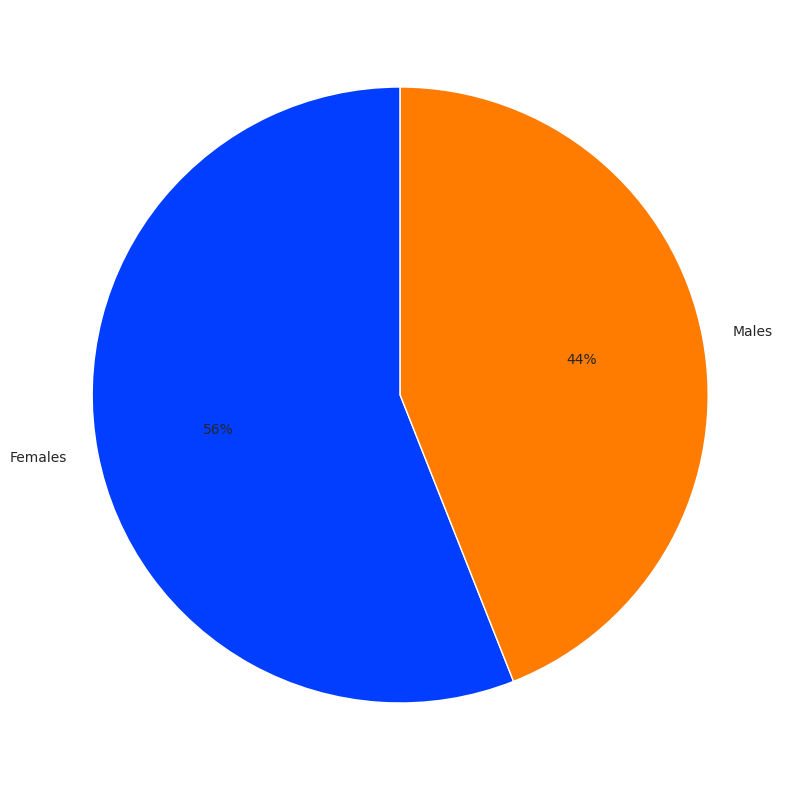

In [32]:
# define Seaborn color palette to use
palette_color = sb.color_palette('bright')

gender = malls_df['Gender'].value_counts()

plt.figure(figsize=[10, 10])
# plotting data on chart
plt.pie(gender,labels=['Females', 'Males'],startangle=90, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

In [16]:
malls_df.Gender.mode()

,Gender
0,F


In [26]:
marital = malls_df['Marital Status'].value_counts().head(10)

In [27]:
marital_labels = marital.index
marital_labels

Index(['Married', 'Single', 'Unknown', 'Divorced'], dtype='object', name='Marital Status')

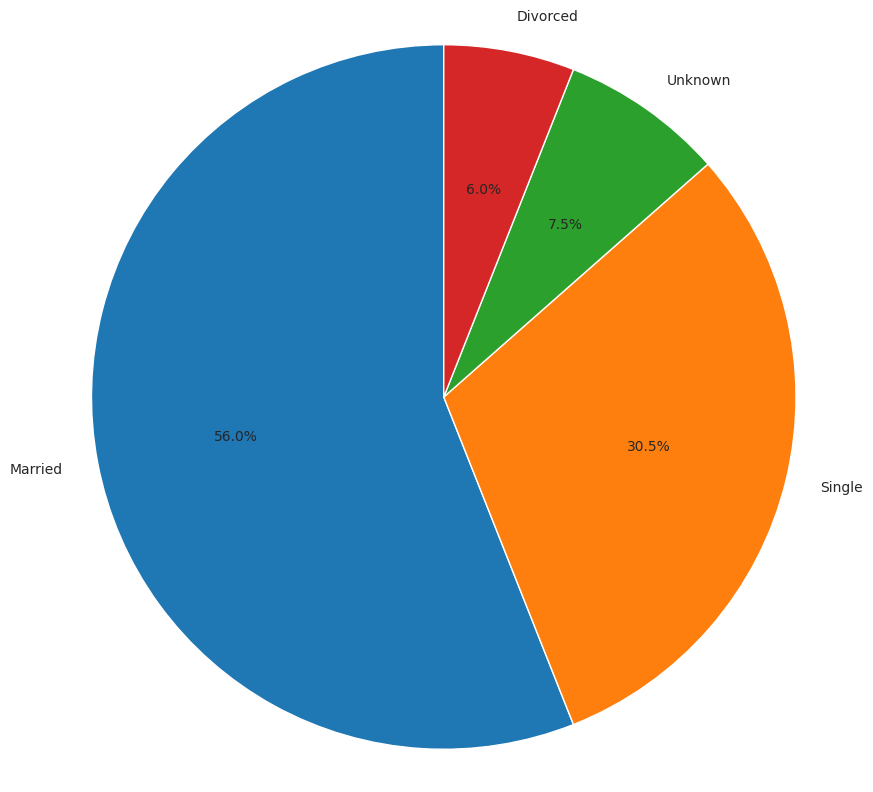

In [28]:
plt.figure(figsize=[10, 10])
p = plt.pie(marital, startangle=90, labels = marital_labels, autopct='%1.1f%%')
plt.axis('equal')

plt.show()

In [31]:
#education = malls_df['Education'].value_counts().head(10)

In [18]:
sb.set_style('dark')

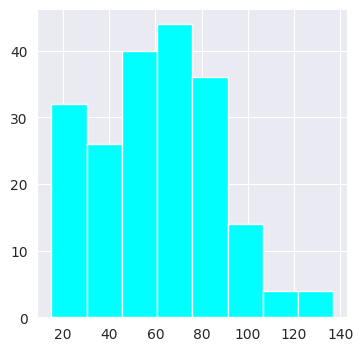

In [19]:
plt.figure(figsize=[4, 4])
malls_df['Annual Income (k$)'].hist(color = 'cyan',bins = 8)
plt.show();


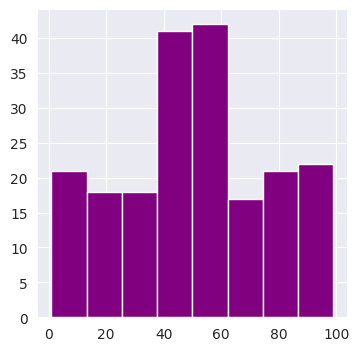

In [20]:
plt.figure(figsize=[4, 4])
malls_df['Spending Score (1-100)'].hist(color = 'purple',bins = 8)
plt.show();

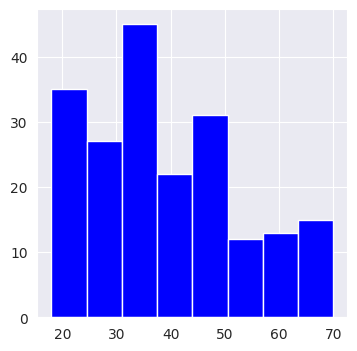

In [21]:
plt.figure(figsize=[4, 4])
malls_df['Age'].hist(color = 'blue',bins = 8)
plt.show();

Text(0.5, 1.0, 'Spending Score (1-100) vs. Annual Income (k$)')

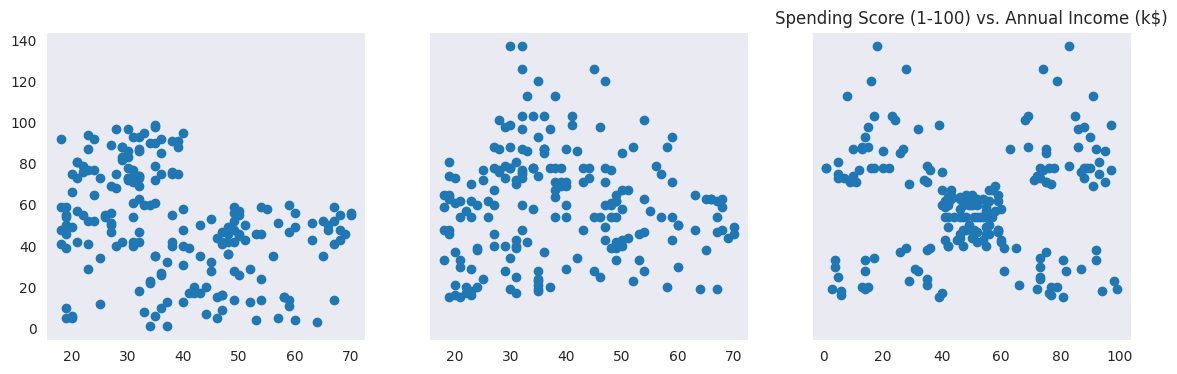

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,4), sharey = True)
plt.title('Age vs. Spending Score (1-100)')
ax1.scatter(malls_df['Age'], malls_df['Spending Score (1-100)'])

ax2.scatter(malls_df['Age'], malls_df['Annual Income (k$)'])
plt.title('Age vs. Annual Income (k$)')
ax3.scatter(malls_df['Spending Score (1-100)'], malls_df['Annual Income (k$)'])
plt.title('Spending Score (1-100) vs. Annual Income (k$)')

## Feature Engineering
Create new features: __Income To Spending Ratio & Age To Income Ratio__

In [33]:
# 1. Income to Spending Ratio
malls_df["Income_to_Spending_Ratio"] = (
    malls_df["Annual Income (k$)"] / malls_df["Spending Score (1-100)"]
)

In [34]:
# 2. Age to Income Ratio
malls_df["Age_to_Income_Ratio"] = (
    malls_df["Age"] / malls_df["Annual Income (k$)"]
)

In [35]:
malls_df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Income_to_Spending_Ratio,Age_to_Income_Ratio
0,1,M,19,High School,Married,15,39,0.384615,1.266667
1,2,M,21,Graduate,Single,15,81,0.185185,1.400000
2,3,F,20,Graduate,Married,16,6,2.666667,1.250000
3,4,F,23,High School,Unknown,16,77,0.207792,1.437500
4,5,F,31,Uneducated,Married,17,40,0.425000,1.823529


## Data Assessment

In [37]:
# summary statistics
malls_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,F,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Education,200,7,Graduate,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,200,4,Married,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0
Income_to_Spending_Ratio,200.0,NaN,NaN,NaN,2.824117,8.025789,0.185185,0.884773,1.126136,1.581255,78.0
Age_to_Income_Ratio,200.0,NaN,NaN,NaN,0.808486,0.540447,0.218978,0.402239,0.632994,1.094767,3.526316


In [ ]:
## Data

## Feature Scaling
To treat features at the same scale to ensure that each feature contributes equally to the clustering algorithm

__Features__

Inputs: Age, Annual Income & Spending Score

Target Feature: Output = ?????

In [38]:
x = malls_df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(x)

StandardScaler()

In [42]:
x_scaled = scaler.transform(x)

In [44]:
# x_scaled

# K-Means Clustering
Experiment with k between 2 to 10, where k is the number of clusters



In [52]:
from sklearn.cluster import KMeans


## Train the Model

In [136]:
kmeans = KMeans(n_clusters=6)

In [137]:
kmeans.fit(x_scaled)

KMeans(n_clusters=6)

**Clustering Results**

In [138]:
identified_clusters = kmeans.fit_predict(x_scaled)
identified_clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4, 3, 4, 3, 4, 1, 4, 3, 4,
       1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 3,
       1, 4, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2], dtype=int32)

In [139]:
# data with clusters
malls_df_clustered = malls_df.copy()
malls_df_clustered['Cluster'] = identified_clusters

In [140]:
malls_df_clustered

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Income_to_Spending_Ratio,Age_to_Income_Ratio,Cluster
0,1,M,19,High School,Married,15,39,0.384615,1.266667,3
1,2,M,21,Graduate,Single,15,81,0.185185,1.400000,4
2,3,F,20,Graduate,Married,16,6,2.666667,1.250000,3
3,4,F,23,High School,Unknown,16,77,0.207792,1.437500,4
4,5,F,31,Uneducated,Married,17,40,0.425000,1.823529,3
...,...,...,...,...,...,...,...,...,...,...
195,196,F,35,High School,Married,120,79,1.518987,0.291667,2
196,197,F,45,High School,Unknown,126,28,4.500000,0.357143,5
197,198,M,32,Uneducated,Married,126,74,1.702703,0.253968,2
198,199,M,32,High School,Married,137,18,7.611111,0.233577,5


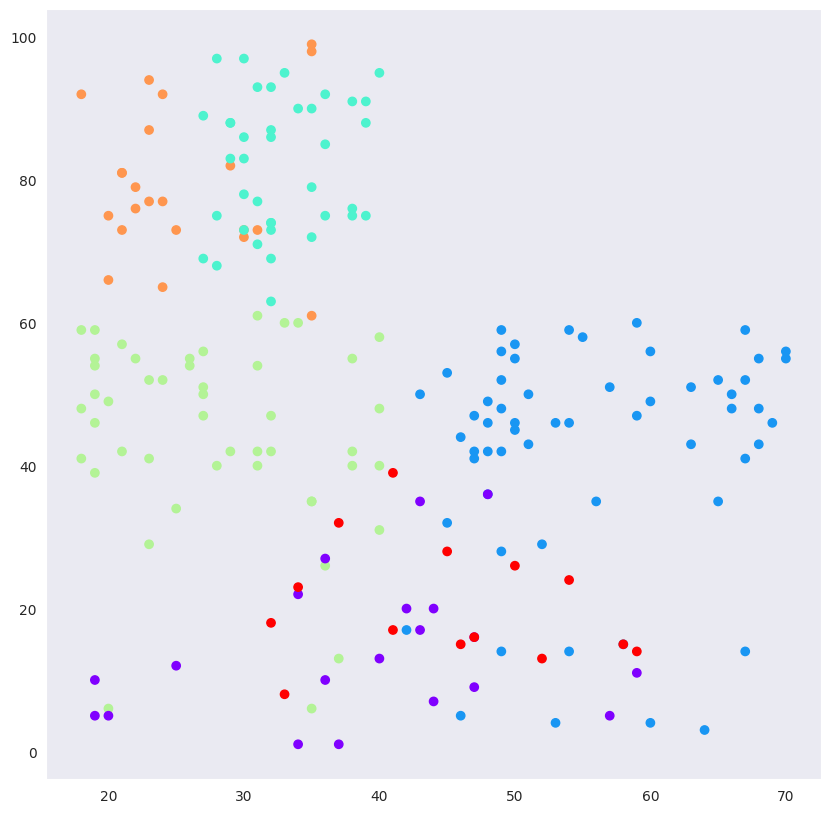

In [141]:
plt.figure(figsize=[10, 10])
plt.scatter(malls_df_clustered['Age'], malls_df_clustered['Spending Score (1-100)'], c=malls_df_clustered['Cluster'], cmap = 'rainbow')
plt.show()

In [142]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [143]:
kmeans.labels_ = kmeans.predict(x_scaled)

## Evaluation

In [134]:
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x_scaled)
  score = silhouette_score(x_scaled, kmeans.labels_)
  print(f'Silhouette Score for {i} clusters: {score}')
  # Inertia value
  inertia = kmeans.inertia_
  print("K-Means Inertia:", inertia)

Silhouette Score for 2 clusters: 0.2484198348559518
K-Means Inertia: 476.5441211423095
Silhouette Score for 3 clusters: 0.3589575717698723
K-Means Inertia: 295.50195461353997
Silhouette Score for 4 clusters: 0.4039582785148566
K-Means Inertia: 205.22514747675913
Silhouette Score for 5 clusters: 0.41664341513732767
K-Means Inertia: 168.2475801755683
Silhouette Score for 6 clusters: 0.4268547747113388
K-Means Inertia: 133.88887021131023
Silhouette Score for 7 clusters: 0.41212584576537337
K-Means Inertia: 120.51766111222082
Silhouette Score for 8 clusters: 0.4100960228678141
K-Means Inertia: 104.1245290759907
Silhouette Score for 9 clusters: 0.40746844818351136
K-Means Inertia: 95.00361778204187
Silhouette Score for 10 clusters: 0.36791625717103627
K-Means Inertia: 91.05567531268883


**From the results of the Silhoutte score for each cluster**: Best k by silhouette score: 6

In [132]:
print('Best k by silhouette score: 6')

Best k by silhouette score: 6




> Based on silhouette analysis, the highest score (0.427) was achieved at k=6, indicating optimal cluster separation. The inertia curve also shows a clear elbow around k=5–6, after which reductions become marginal. Therefore, k=6 was selected as the optimal number of clusters.



## Cluster Profiling and Interpretation

In [144]:
cluster_profile = (
    malls_df_clustered
    .groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    .mean()
    .round(2)
)

cluster_profile


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,38.70,77.90,14.10
1,55.55,48.48,41.78
2,32.69,86.54,82.13
3,27.96,50.00,44.64
4,25.27,25.73,79.36
5,44.93,103.64,20.57


In [145]:
cluster_sizes = malls_df_clustered['Cluster'].value_counts().sort_index()

cluster_profile['Customer Count'] = cluster_sizes.values
cluster_profile


,Age,Annual Income (k$),Spending Score (1-100),Customer Count
Cluster,,,,
0,38.70,77.90,14.10,20
1,55.55,48.48,41.78,58
2,32.69,86.54,82.13,39
3,27.96,50.00,44.64,47
4,25.27,25.73,79.36,22
5,44.93,103.64,20.57,14


## **Cluster Summaries and Business Actions**

### **Cluster 0 – High-Income, Low-Spending Professionals**

Customers in this cluster have high income but very low spending scores, indicating cautious or disengaged purchasing behavior.
**Business action:** Use personalized promotions, premium trials, and targeted messaging to convert latent purchasing power into actual spend.

---

### **Cluster 1 – Older, Moderate-Income Steady Shoppers**

This segment consists of older customers with moderate income and average spending behavior, suggesting stable but conservative purchasing habits.
**Business action:** Focus on loyalty programs, value bundles, and trust-based marketing to maintain long-term engagement.

---

### **Cluster 2 – Affluent High-Spenders (Premium Segment)**

These customers are relatively young, earn high incomes, and have the highest spending scores, making them the most valuable segment.
**Business action:** Prioritize this group with VIP rewards, exclusive offers, early product access, and premium customer experiences.

---

### **Cluster 3 – Young, Average-Income Mainstream Shoppers**

This cluster includes younger customers with average income and moderate spending, representing a large and balanced customer base.
**Business action:** Use mass marketing campaigns, trend-driven promotions, and cross-selling strategies to gradually increase basket size.

---

### **Cluster 4 – Young, Low-Income but High-Spending Enthusiasts**

Despite low income, these customers spend aggressively, indicating impulsive or aspirational buying behavior.
**Business action:** Promote affordable trendy products, discounts, and installment options while managing credit and return risks.

---

### **Cluster 5 – Very High-Income, Very Low-Spending Skeptics**

This small but wealthy segment spends very little, suggesting low brand affinity or unmet expectations.
**Business action:** Re-engage through concierge-style service, personalized outreach, and exclusive brand storytelling to build emotional connection.

---

## **Strategic Insight**

> *The segmentation reveals that spending behavior is not directly proportional to income, highlighting the importance of tailored marketing strategies rather than one-size-fits-all approaches.*

-
